In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.shape

(284, 3)

In [ ]:
df.describe()

,Age,Salary,Purchased
count,284.000000,284.000000,284.000000
mean,40.746479,73535.211268,0.500000
std,10.196609,36214.254846,0.500883
min,18.000000,16000.000000,0.000000
25%,35.000000,43750.000000,0.000000
50%,40.000000,72000.000000,0.500000
75%,48.000000,96000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x = df.drop('Purchased',axis=1).values
y = df['Purchased'].values

print(x.shape,y.shape)

(284, 2) (284,)


In [ ]:
sc = StandardScaler()
xsc = sc.fit_transform(x)
# fit calculates mean and std of both columns of the df

xsc.shape

(284, 2)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(xsc,y,test_size=0.2,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(227, 2) (57, 2) (227,) (57,)


In [ ]:
from sklearn.svm import SVC

In [ ]:
# kernels : linear, poly, rbf, sigmoid, precomputed

In [ ]:
# C : float, default 1.0, it is a regularization parameter to control the margin.
# higher the c value means closer boundary of that class.

In [ ]:
model = SVC(C=100.0, kernel='rbf')  # default
model.fit(xtrain,ytrain).score(xtest,ytest)

0.9122807017543859

In [ ]:
yhat = model.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [ ]:
print(classification_report(ytest,yhat))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        24
           1       0.87      1.00      0.93        33

    accuracy                           0.91        57
   macro avg       0.93      0.90      0.91        57
weighted avg       0.92      0.91      0.91        57



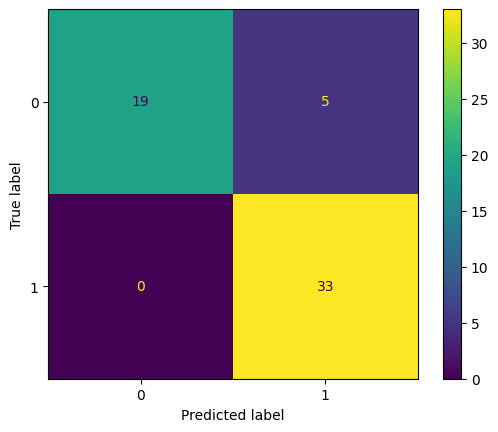

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(ytest,yhat)).plot()

(400, 443) (400, 443)


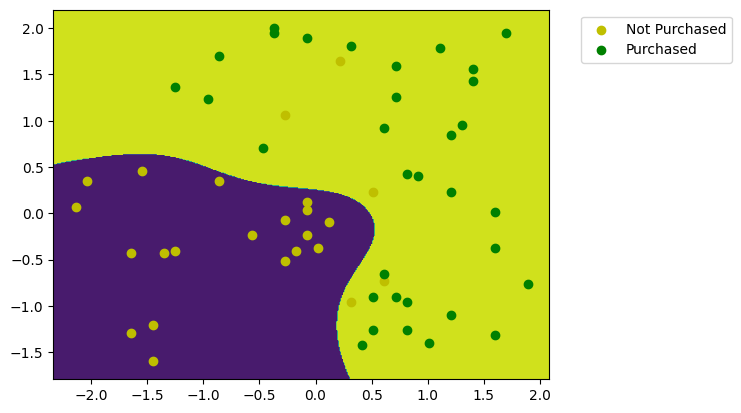

In [ ]:
age = np.arange(np.min(xtest[:,0])-0.2, np.max(xtest[:,0])+0.2, 0.01)
salary = np.arange(np.min(xtest[:,1])-0.2, np.max(xtest[:,1])+0.2, 0.01)

# here -0.2 and +0.2 is just for padding so our plot's curves do not touch the axes.

AGE,SAL = np.meshgrid(age,salary)
print(AGE.shape, SAL.shape)

# In X rows values' are same
# In Y column values' are same

feature1 = AGE.ravel()
feature2 = SAL.ravel()

test_vals = np.c_[feature1,feature2]
test_vals.shape

# concatenate as per model's need and reshape to 2D shape so that contour can be plot
# get predicted answers
pred_ans = model.predict(test_vals).reshape(AGE.shape)
pred_ans.shape

plt.contourf(AGE,SAL,pred_ans)

plt.scatter(xtest[ytest==0,0],xtest[ytest==0,1], c='y',label='Not Purchased')
plt.scatter(xtest[ytest==1,0],xtest[ytest==1,1], c='g',label='Purchased')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

Checking with linear model

In [ ]:
model = SVC(kernel='linear')
model.fit(xtrain,ytrain).score(xtest,ytest)

0.7894736842105263

In [ ]:
yhat = model.predict(xtest)
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(ytest,yhat))


              precision    recall  f1-score   support

           0       0.73      0.79      0.76        24
           1       0.84      0.79      0.81        33

    accuracy                           0.79        57
   macro avg       0.78      0.79      0.79        57
weighted avg       0.79      0.79      0.79        57



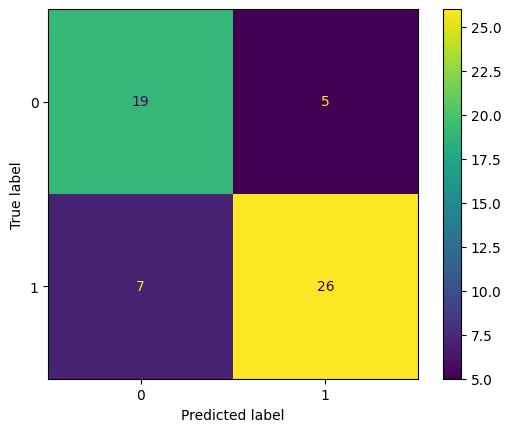

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(ytest,yhat)).plot()


(400, 443) (400, 443)


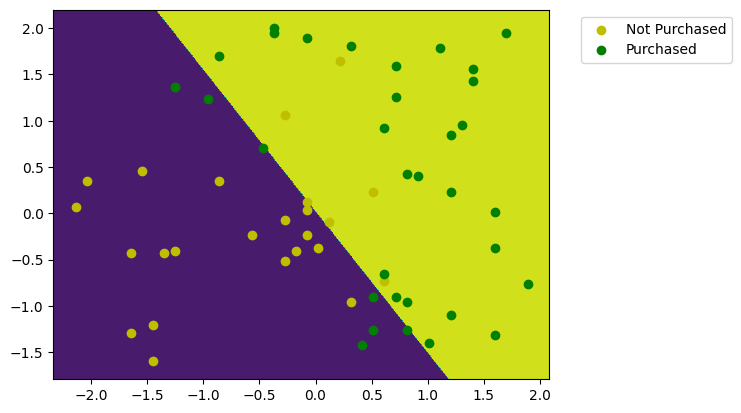

In [ ]:
age = np.arange(np.min(xtest[:,0])-0.2, np.max(xtest[:,0])+0.2, 0.01)
salary = np.arange(np.min(xtest[:,1])-0.2, np.max(xtest[:,1])+0.2, 0.01)

# here -0.2 and +0.2 is just for padding so our plot's curves do not touch the axes.

AGE,SAL = np.meshgrid(age,salary)
print(AGE.shape, SAL.shape)

# In X rows values' are same
# In Y column values' are same

feature1 = AGE.ravel()
feature2 = SAL.ravel()

test_vals = np.c_[feature1,feature2]
test_vals.shape

# concatenate as per model's need and reshape to 2D shape so that contour can be plot
# get predicted answers
pred_ans = model.predict(test_vals).reshape(AGE.shape)
pred_ans.shape

plt.contourf(AGE,SAL,pred_ans)

plt.scatter(xtest[ytest==0,0],xtest[ytest==0,1], c='y',label='Not Purchased')
plt.scatter(xtest[ytest==1,0],xtest[ytest==1,1], c='g',label='Purchased')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

 .

Polynomial regression model

In [ ]:
model = SVC(kernel='poly')
model.fit(xtrain,ytrain).score(xtest,ytest)

0.7368421052631579

In [ ]:
yhat = model.predict(xtest)
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(ytest,yhat))

              precision    recall  f1-score   support

           0       0.62      0.96      0.75        24
           1       0.95      0.58      0.72        33

    accuracy                           0.74        57
   macro avg       0.79      0.77      0.74        57
weighted avg       0.81      0.74      0.73        57



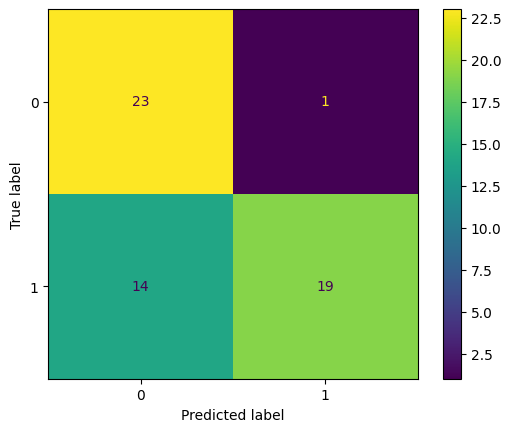

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(ytest,yhat)).plot()

(400, 443) (400, 443)


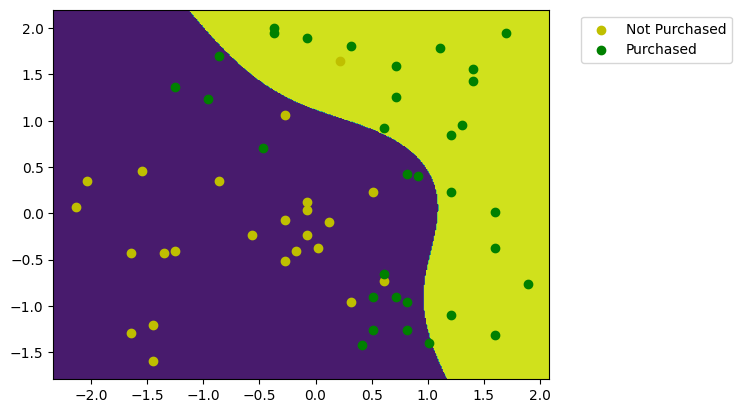

In [ ]:
age = np.arange(np.min(xtest[:,0])-0.2, np.max(xtest[:,0])+0.2, 0.01)
salary = np.arange(np.min(xtest[:,1])-0.2, np.max(xtest[:,1])+0.2, 0.01)

# here -0.2 and +0.2 is just for padding so our plot's curves do not touch the axes.

AGE,SAL = np.meshgrid(age,salary)
print(AGE.shape, SAL.shape)

# In X rows values' are same
# In Y column values' are same

feature1 = AGE.ravel()
feature2 = SAL.ravel()

test_vals = np.c_[feature1,feature2]
test_vals.shape

# concatenate as per model's need and reshape to 2D shape so that contour can be plot
# get predicted answers
pred_ans = model.predict(test_vals).reshape(AGE.shape)
pred_ans.shape

plt.contourf(AGE,SAL,pred_ans)

plt.scatter(xtest[ytest==0,0],xtest[ytest==0,1], c='y',label='Not Purchased')
plt.scatter(xtest[ytest==1,0],xtest[ytest==1,1], c='g',label='Purchased')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [ ]:
model = SVC(kernel='sigmoid')
model.fit(xtrain,ytrain).score(xtest,ytest)

0.7719298245614035

In [ ]:
yhat = model.predict(xtest)
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(ytest,yhat))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71        24
           1       0.78      0.85      0.81        33

    accuracy                           0.77        57
   macro avg       0.77      0.76      0.76        57
weighted avg       0.77      0.77      0.77        57



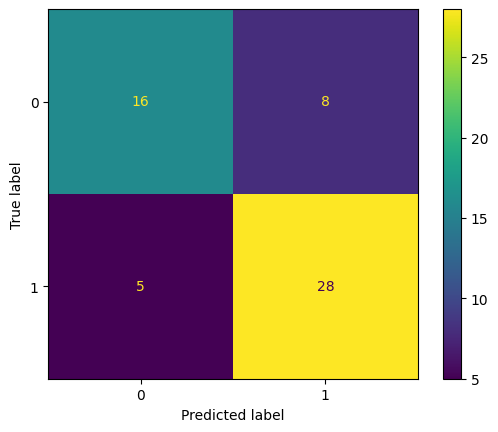

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(ytest,yhat)).plot()

(400, 443) (400, 443)


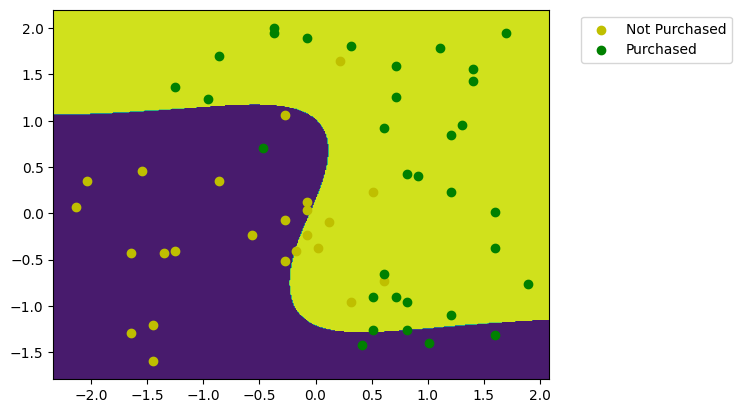

In [ ]:
age = np.arange(np.min(xtest[:,0])-0.2, np.max(xtest[:,0])+0.2, 0.01)
salary = np.arange(np.min(xtest[:,1])-0.2, np.max(xtest[:,1])+0.2, 0.01)

# here -0.2 and +0.2 is just for padding so our plot's curves do not touch the axes.

AGE,SAL = np.meshgrid(age,salary)
print(AGE.shape, SAL.shape)

# In X rows values' are same
# In Y column values' are same

feature1 = AGE.ravel()
feature2 = SAL.ravel()

test_vals = np.c_[feature1,feature2]
test_vals.shape

# concatenate as per model's need and reshape to 2D shape so that contour can be plot
# get predicted answers
pred_ans = model.predict(test_vals).reshape(AGE.shape)
pred_ans.shape

plt.contourf(AGE,SAL,pred_ans)

plt.scatter(xtest[ytest==0,0],xtest[ytest==0,1], c='y',label='Not Purchased')
plt.scatter(xtest[ytest==1,0],xtest[ytest==1,1], c='g',label='Purchased')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)